# Example: Repeated Bertrand Game

This notebook provides example code to make it easier to write a player function. 

* Write player functions, `player1.py`, `player2.py`, ... in the folder `./players/`. 
* Run this notebook: it will automatically read them all.

In [1]:
from game_tournament.game import RepeatedBertrandGame, Tournament
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

%load_ext autoreload
%autoreload 2 

# Reading in player modules 

In [2]:
# later, we will give the path directly to a function
player_path = './examples/players_repeated/'

# General setup, common across specifications 

* **Marginal cost:** $c = 0.5$ 
* **Action space:** $p \in [c; 10]$

In [3]:
c = 0.5
pmin = c
pmax = 10.

### Demand curve
$$ D_i(p_i, p_j) = \frac{\exp(1-p_i)}{1 + \exp(1-p_i) + \exp(1 - p_j)} $$

In [4]:
def demand_function(pi, pj): 
    '''
    Args
        pi,pj: prices 
    Returns: 
        demand to firm i
    '''
    ui = np.exp(1.-1.0*pi)
    uj = np.exp(1.-1.0*pj)
    u0 = 1.0 
    
    denom = u0 + ui + uj
    return ui / denom 

def profit1(p1,p2): 
    s1 = demand_function(p1,p2)
    return s1 * (p1-c)

def profit2(p2,p1):
    s2 = demand_function(p2,p1)
    return s2 * (p2-c)

    

# Running a single game

We start by directly importing two specific player functions and setting them up to compete against one another. 

In [5]:
# Direct import statements 
from examples.players_repeated.player3 import player as player1
from examples.players_repeated.player2 import player as player2
print(f'Player 1: {player1.name}')
print(f'Player 2: {player2.name}')

Player 1: Undercutting Bastard
Player 2: pmin


In [6]:
# initialize instances of two player functions
p1 = player1()
p2 = player2()

# define the game 
price_range = (0.0, 5.0)
marginal_cost = 1.0
beta = 0.99
G = RepeatedBertrandGame(p1, p2, profit1, profit2, price_range, beta)
print(G)

Undercutting Bastard vs. pmin: played 0 rounds


The history of the game is empty since no rounds have been played: 

In [7]:
G.history

array([], shape=(0, 2), dtype=float64)

Now let us play `T = 100` rounds of the game. 

In [8]:
G.play_game(T=10)

In [9]:
print(G)

Undercutting Bastard vs. pmin: played 10 rounds


In [10]:
# Now the history property has been populated
G.history

array([[4.995, 0.   ],
       [4.995, 0.   ],
       [5.   , 0.   ],
       [5.   , 0.   ],
       [5.   , 0.   ],
       [5.   , 0.   ],
       [5.   , 0.   ],
       [5.   , 0.   ],
       [5.   , 0.   ],
       [5.   , 0.   ]])

In [11]:
G.history.shape

(10, 2)

In [12]:
# we can use this function to print a nice table (a pandas dataframe is returned)
tab = G.get_game_actions_and_payoffs()
tab 

actions                   payoffs          
      Undercutting Bastard pmin Undercutting Bastard      pmin
Round                                                         
0                    4.995  0.0             0.022143 -0.363729
1                    4.995  0.0             0.022143 -0.363729
2                    5.000  0.0             0.022058 -0.363738
3                    5.000  0.0             0.022058 -0.363738
4                    5.000  0.0             0.022058 -0.363738
5                    5.000  0.0             0.022058 -0.363738
6                    5.000  0.0             0.022058 -0.363738
7                    5.000  0.0             0.022058 -0.363738
8                    5.000  0.0             0.022058 -0.363738
9                    5.000  0.0             0.022058 -0.363738

Using this dataframe, we can plot the actions and payoffs of the two players over the course of the game 

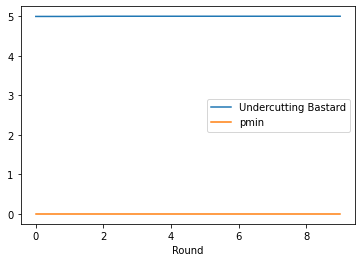

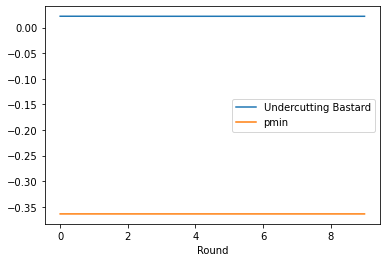

In [13]:
tab['actions'].plot(); 
tab['payoffs'].plot(); 

# Running a Tournament

This will run a full tournament between all the player functions found in the folder `player_path`. 

In [14]:
T = 100
game_data = {'profit_function1':profit1, 'profit_function2':profit2, 'discount_factor': beta, 
    'price_range': (pmin,pmax)
}
t = Tournament(player_path, RepeatedBertrandGame, game_data=game_data, T=T, tournament_name='RBG', )
t.run() # run the tournament and score the game 

10it [00:01,  6.59it/s]

Tournament winner was: Trigger (against 4 opponents)


,RBG
Player,
Trigger,0.186721
Tit-for-tatter,0.085892
Undercutting Bastard,0.081947
Randawg,0.060661
pmin,0.000000


In [15]:
matchup_results = t.get_matchup_results()
matchup_results

Opponent,Trigger,Randawg,Tit-for-tatter,Undercutting Bastard,pmin
Player,,,,,
Trigger,NaN,0.237748,0.200741,0.189185,0.119212
Randawg,0.054728,NaN,0.080152,0.070959,0.036805
Tit-for-tatter,0.192403,0.076360,NaN,0.074797,0.000009
Undercutting Bastard,0.186810,0.062518,0.078178,NaN,0.000281
pmin,0.000000,0.000000,0.000000,0.000000,NaN


Print the matchup results to see if there is a pattern in who is good against whom. 

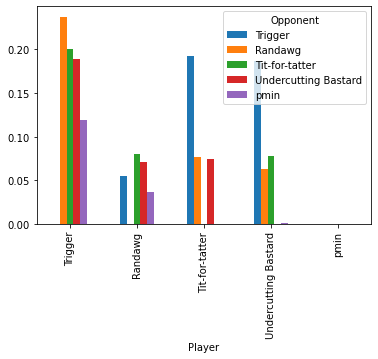

In [16]:
matchup_results.plot.bar(); 

# Access individual games

It can be useful to access individual games from the tournament to check performance. To do so, note that `t.games[:]` is the list of the games that were played. Each of these have the same printing and plotting functions as a simple game has.  

In [17]:
print(f'Available games in tournament:')
for i,g in enumerate(t.games): 
    print(f'{i}: {g.name}')

Available games in tournament:
0: Trigger vs. Randawg
1: Trigger vs. Tit-for-tatter
2: Trigger vs. Undercutting Bastard
3: Trigger vs. pmin
4: Randawg vs. Tit-for-tatter
5: Randawg vs. Undercutting Bastard
6: Randawg vs. pmin
7: Tit-for-tatter vs. Undercutting Bastard
8: Tit-for-tatter vs. pmin
9: Undercutting Bastard vs. pmin


Showing game history for Randawg vs. Tit-for-tatter


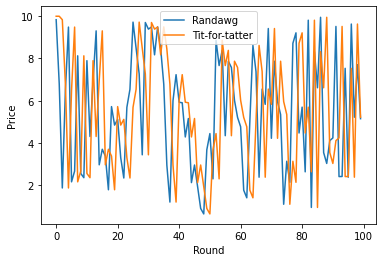

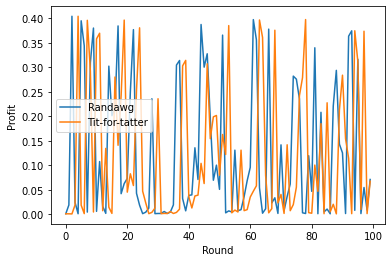

In [18]:
i_game = 4
print(f'Showing game history for {t.games[i_game].name}')
t.games[i_game].get_game_actions_and_payoffs()['actions'].plot(ylabel='Price');
t.games[i_game].get_game_actions_and_payoffs()['payoffs'].plot(ylabel='Profit');